In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [5]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
import datetime

df['date'] = pd.to_datetime(df['key'])

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [9]:
df['pickup_hour'] = df['date'].dt.hour
df['pickup_minute'] = df['date'].dt.minute

In [10]:
df.drop(['key','date'],axis=1,inplace=True)

In [11]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour,pickup_minute
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47


In [12]:
df.nunique()

fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
year                      7
month                    12
day                      31
pickup_hour              24
pickup_minute            60
dtype: int64

In [13]:
df['pickup_point'] = df['pickup_latitude'].round(2).astype(str) + ',' + df['pickup_longitude'].round(2).astype(str)

In [14]:
df['dropoff_point'] = df['dropoff_latitude'].round(2).astype(str) + ',' + df['dropoff_longitude'].round(2).astype(str)

In [15]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [16]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour,pickup_minute,pickup_point,dropoff_point
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,"40.74,-74.0","40.72,-74.0"
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,"40.73,-73.99","40.75,-73.99"
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,"40.74,-74.01","40.77,-73.96"
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,"40.79,-73.98","40.8,-73.97"
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,"40.74,-73.93","40.76,-73.97"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   year               200000 non-null  int64  
 7   month              200000 non-null  int64  
 8   day                200000 non-null  int64  
 9   pickup_hour        200000 non-null  int64  
 10  pickup_minute      200000 non-null  int64  
 11  pickup_point       200000 non-null  object 
 12  dropoff_point      200000 non-null  object 
dtypes: float64(5), int64(6), object(2)
memory usage: 19.8+ MB


We created some new feature for the purpose of analysis. However, some of them will be deleted once we develop our model

In [18]:
date_cols = ['year','month','day']

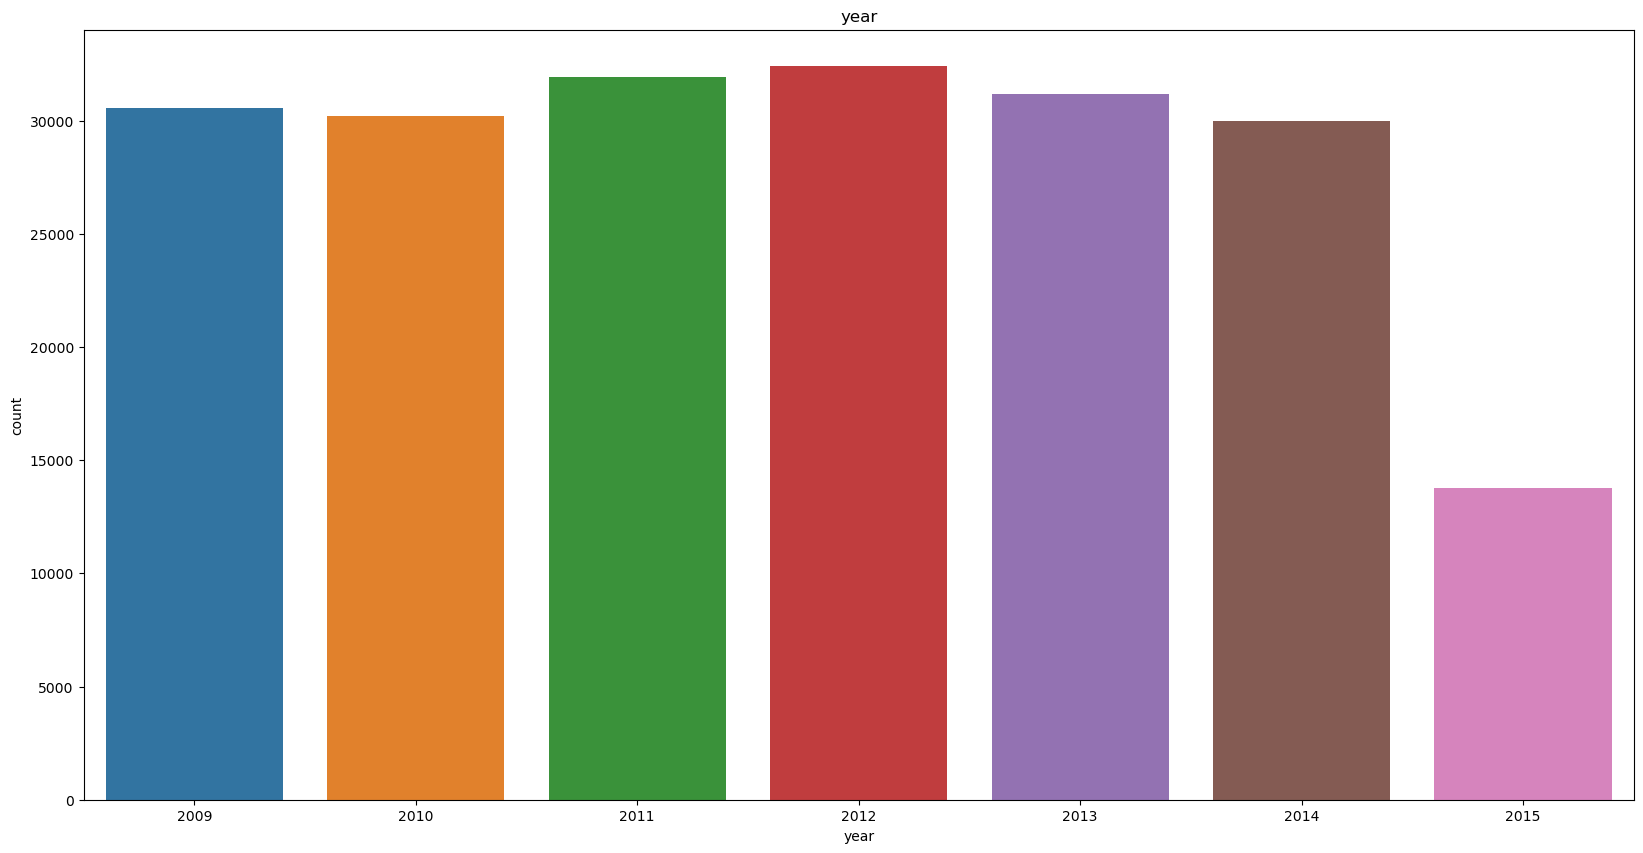

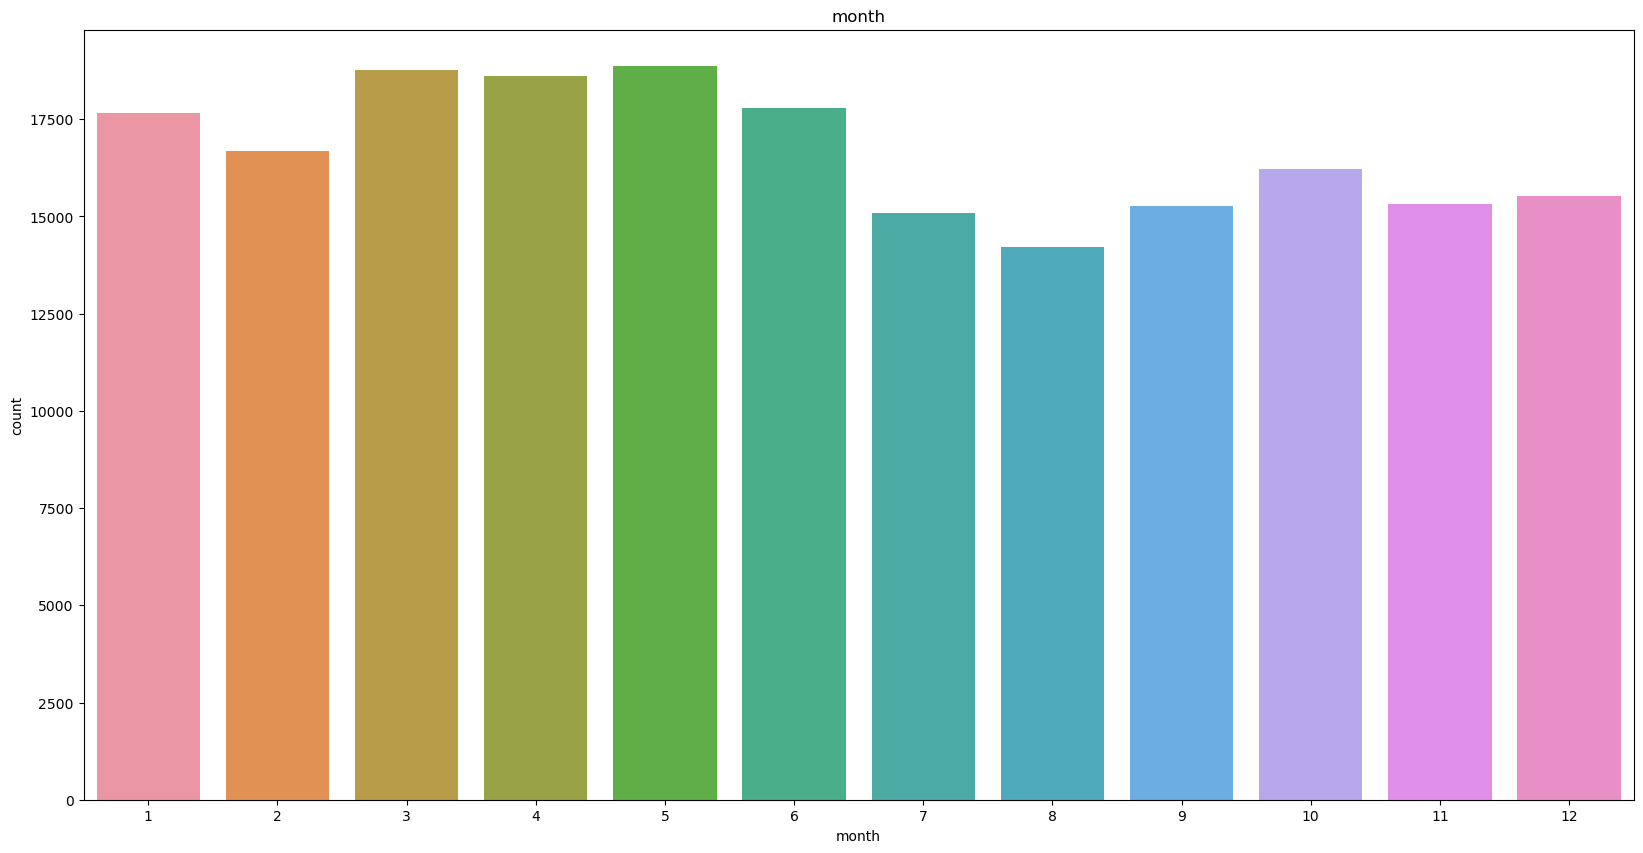

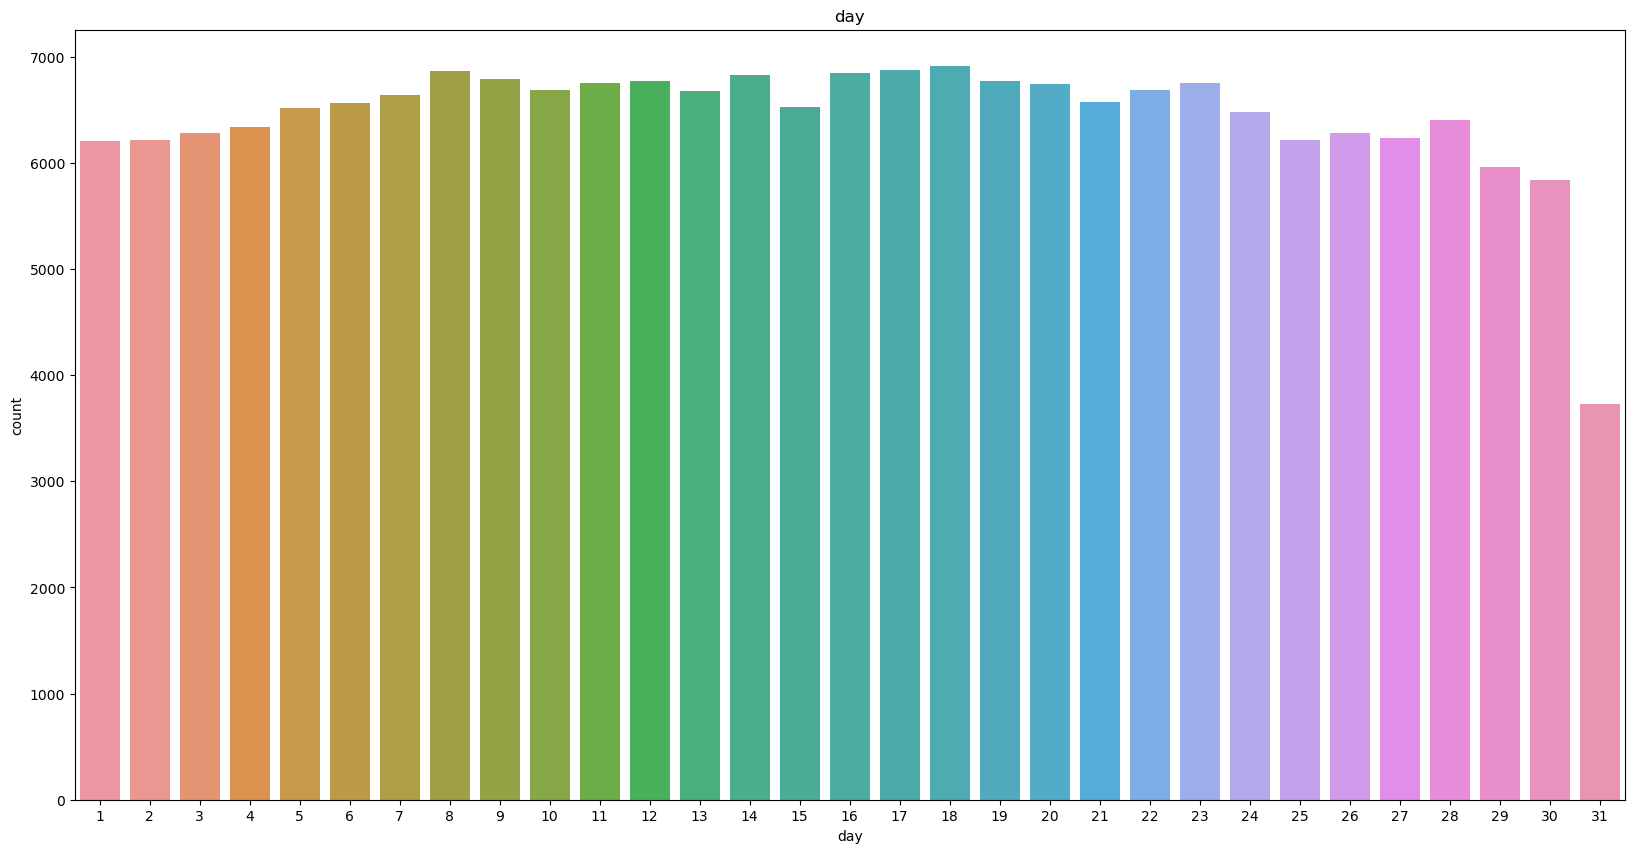

In [19]:
for col in date_cols:
    plt.figure(figsize=(20,10))
    sns.countplot(df,x=col)
    plt.title(col)

<Figure size 2000x1000 with 0 Axes>

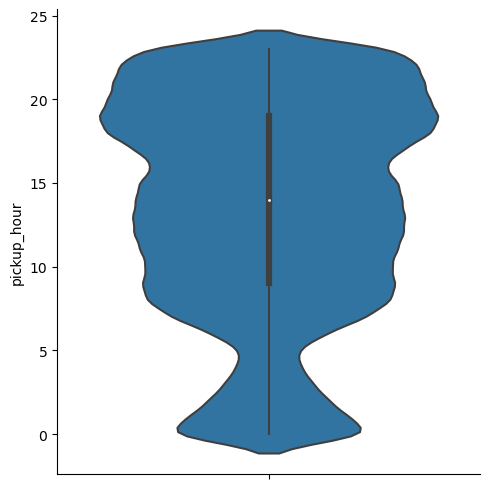

In [20]:
plt.figure(figsize=(20,10))
sns.catplot(df, y='pickup_hour',kind='violin')

<Figure size 2000x1000 with 0 Axes>

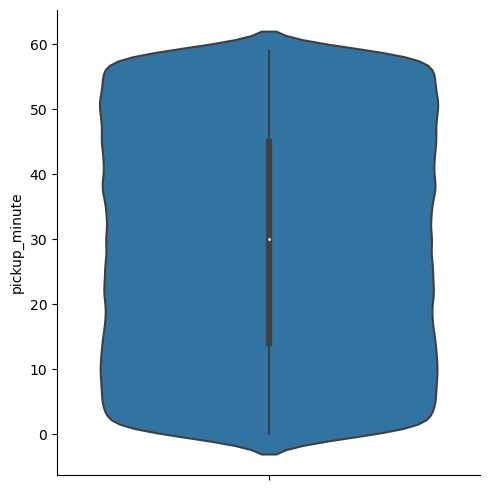

In [21]:
plt.figure(figsize=(20,10))
sns.catplot(df, y='pickup_minute',kind='violin')

<Axes: xlabel='fare_amount'>

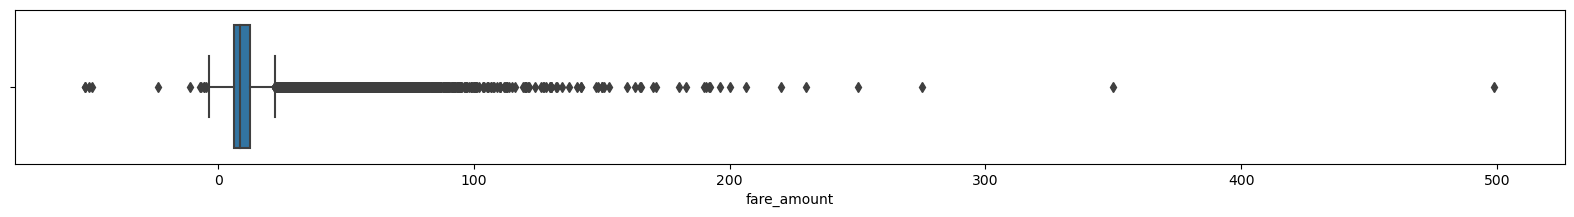

In [22]:
plt.figure(figsize=(20,2))
sns.boxplot(df,x='fare_amount')

In the case of fare amount there are a number of changes we need to make. There are negative values which is ovbiusly an error and there also seem to be outliers on the upper end

In [23]:
df[df['fare_amount'] < 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour,pickup_minute,pickup_point,dropoff_point
63395,-5.00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,3,23,7,"40.75,-73.99","40.75,-73.99"
71246,-3.30,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,11,21,47,"40.77,-73.95","40.77,-73.95"
79903,-3.50,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,1,14,43,"40.78,-73.98","40.78,-73.98"
89322,-49.57,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,9,8,26,"40.79,-73.97","40.79,-73.97"
92063,-23.70,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,12,8,49,"40.77,-73.95","40.71,-74.01"
98875,-52.00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,20,21,31,"40.73,-74.0","40.73,-74.01"
104080,-7.30,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,9,20,25,"40.77,-73.95","40.78,-73.95"
111589,-52.00,-73.984665,40.759026,0.000000,0.000000,5,2015,2,23,19,26,"40.76,-73.98","0.0,0.0"
139272,-6.90,-73.988727,40.736445,-73.977622,40.750487,1,2010,2,23,18,52,"40.74,-73.99","40.75,-73.98"
148803,-5.70,-73.977300,40.742783,-73.988837,40.747465,3,2010,2,12,10,50,"40.74,-73.98","40.75,-73.99"


Getting new columns to see distance traveled based on longitude and latitude.

In [24]:
df['distance_traveled_longitude'] = abs(abs(df['pickup_longitude']) - abs(df['dropoff_longitude']))

In [25]:
df['distance_traveled_latitude'] = abs(abs(df['pickup_latitude']) - abs(df['dropoff_latitude']))

In [26]:
df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour,pickup_minute,pickup_point,dropoff_point,distance_traveled_longitude,distance_traveled_latitude
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,"40.74,-74.0","40.72,-74.0",0.000305,0.015137
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,"40.73,-73.99","40.75,-73.99",0.000355,0.022100
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,"40.74,-74.01","40.77,-73.96",0.042478,0.031877


<Axes: xlabel='distance_traveled_longitude', ylabel='fare_amount'>

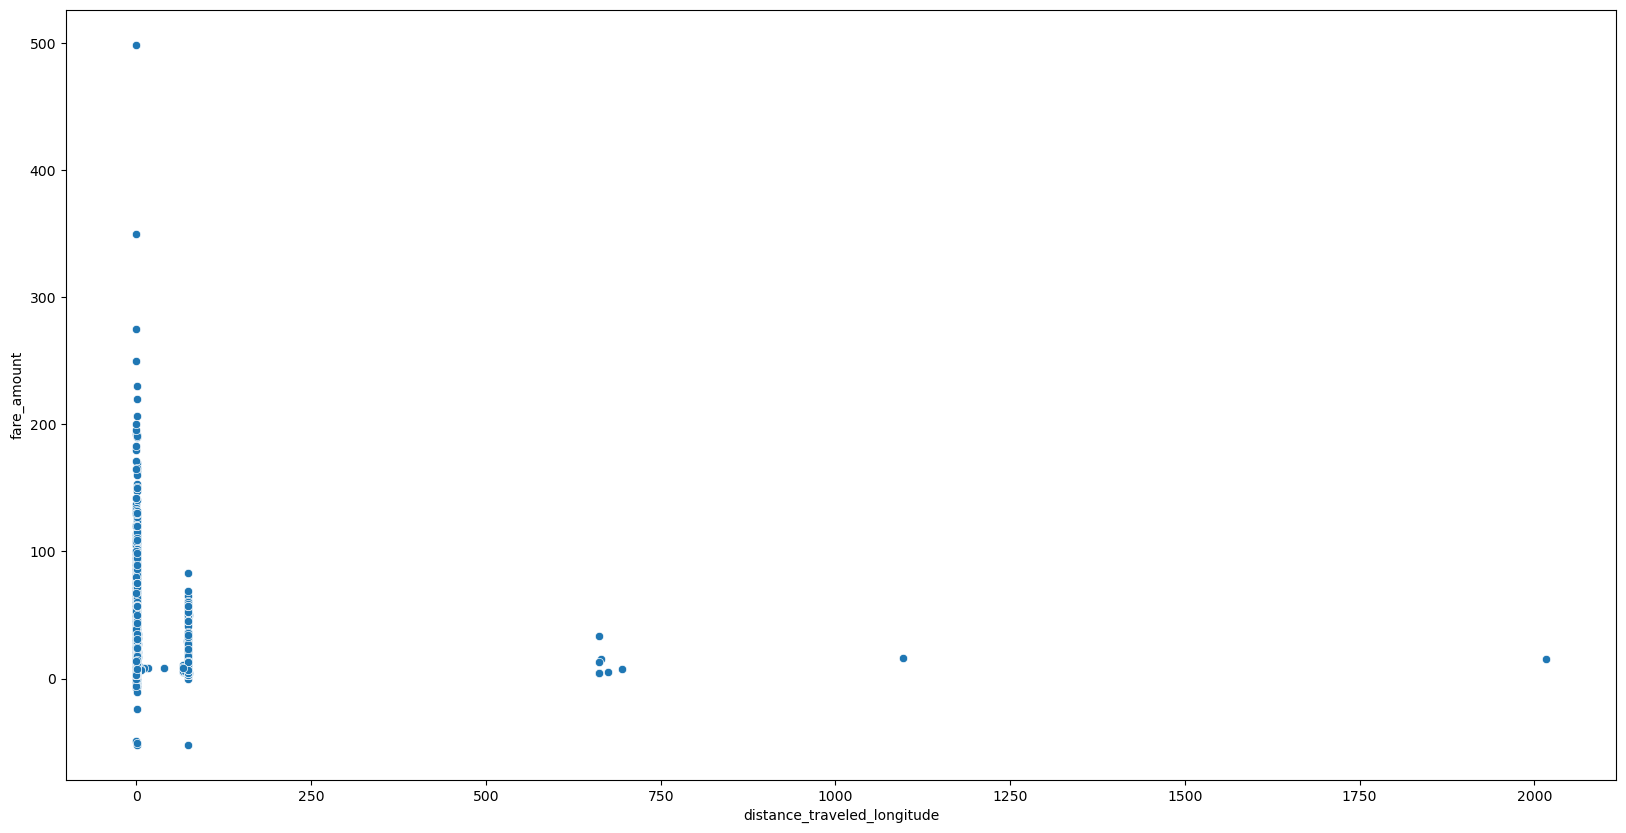

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['fare_amount'],x=df['distance_traveled_longitude'])

<Axes: xlabel='distance_traveled_latitude', ylabel='fare_amount'>

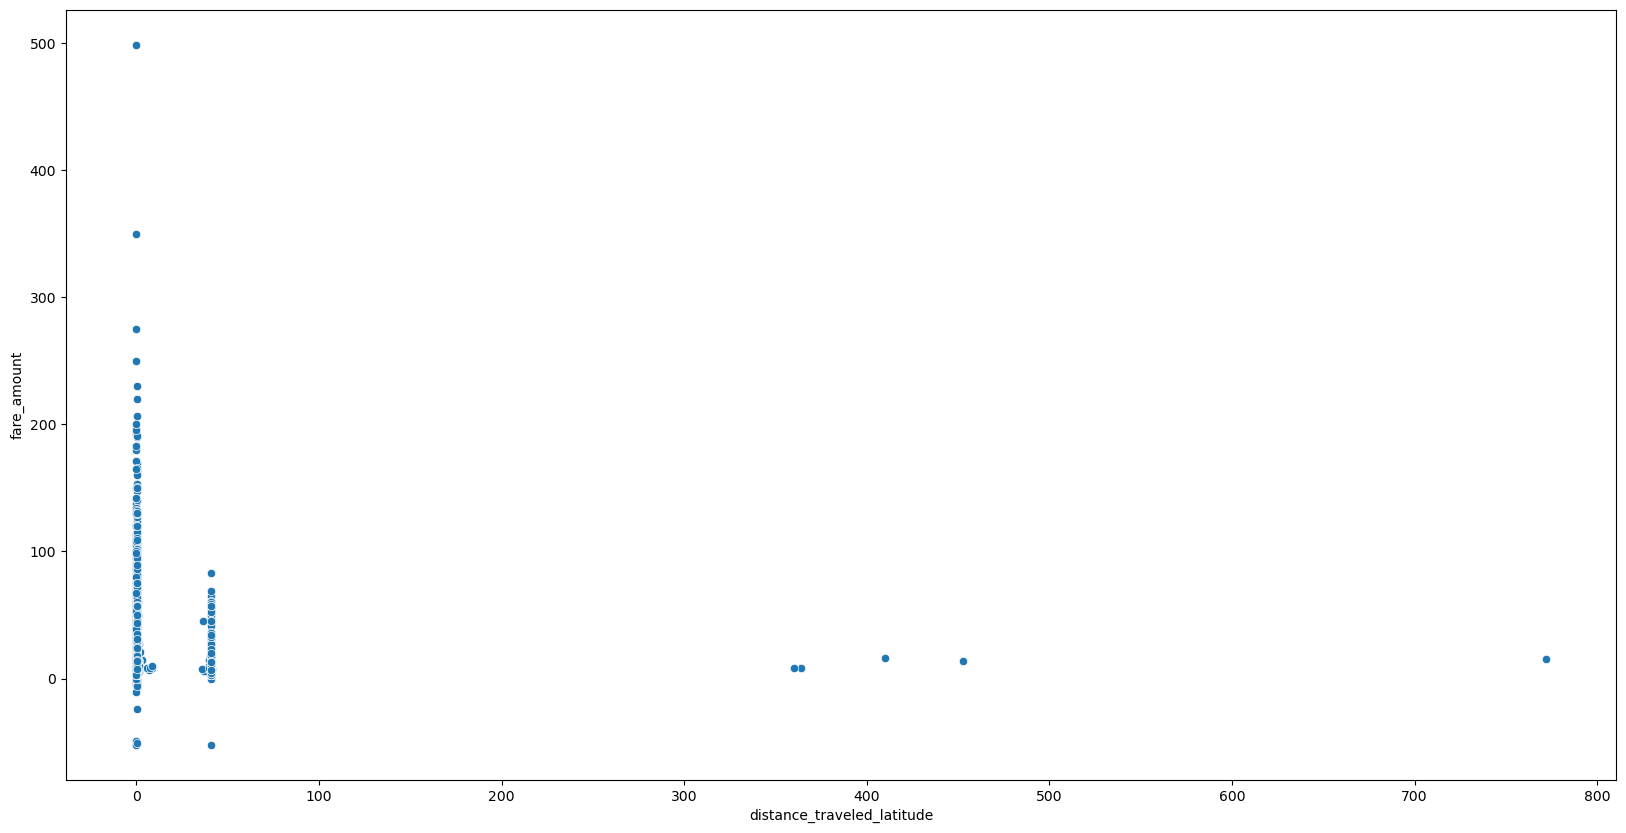

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['fare_amount'],x=df['distance_traveled_latitude'])

This gives us a better idea to decide if the points with such high fare amounts were indeed mistakes given that those charges apply to trips with distances whose prices are much lower. We also observe outliers (possibly mistakes as well) for distances traveled both for latitude and longitude.  

In [29]:
df.drop(df[df['fare_amount'] > 250].index, inplace=True)

In [30]:
df.drop(df[df['fare_amount'] < 0].index, inplace=True)

In [31]:
df.drop(df[df['distance_traveled_longitude'] > 250].index, inplace=True)

In [32]:
df.drop(df[df['distance_traveled_latitude'] > 250].index, inplace=True)

<Axes: xlabel='distance_traveled_longitude', ylabel='fare_amount'>

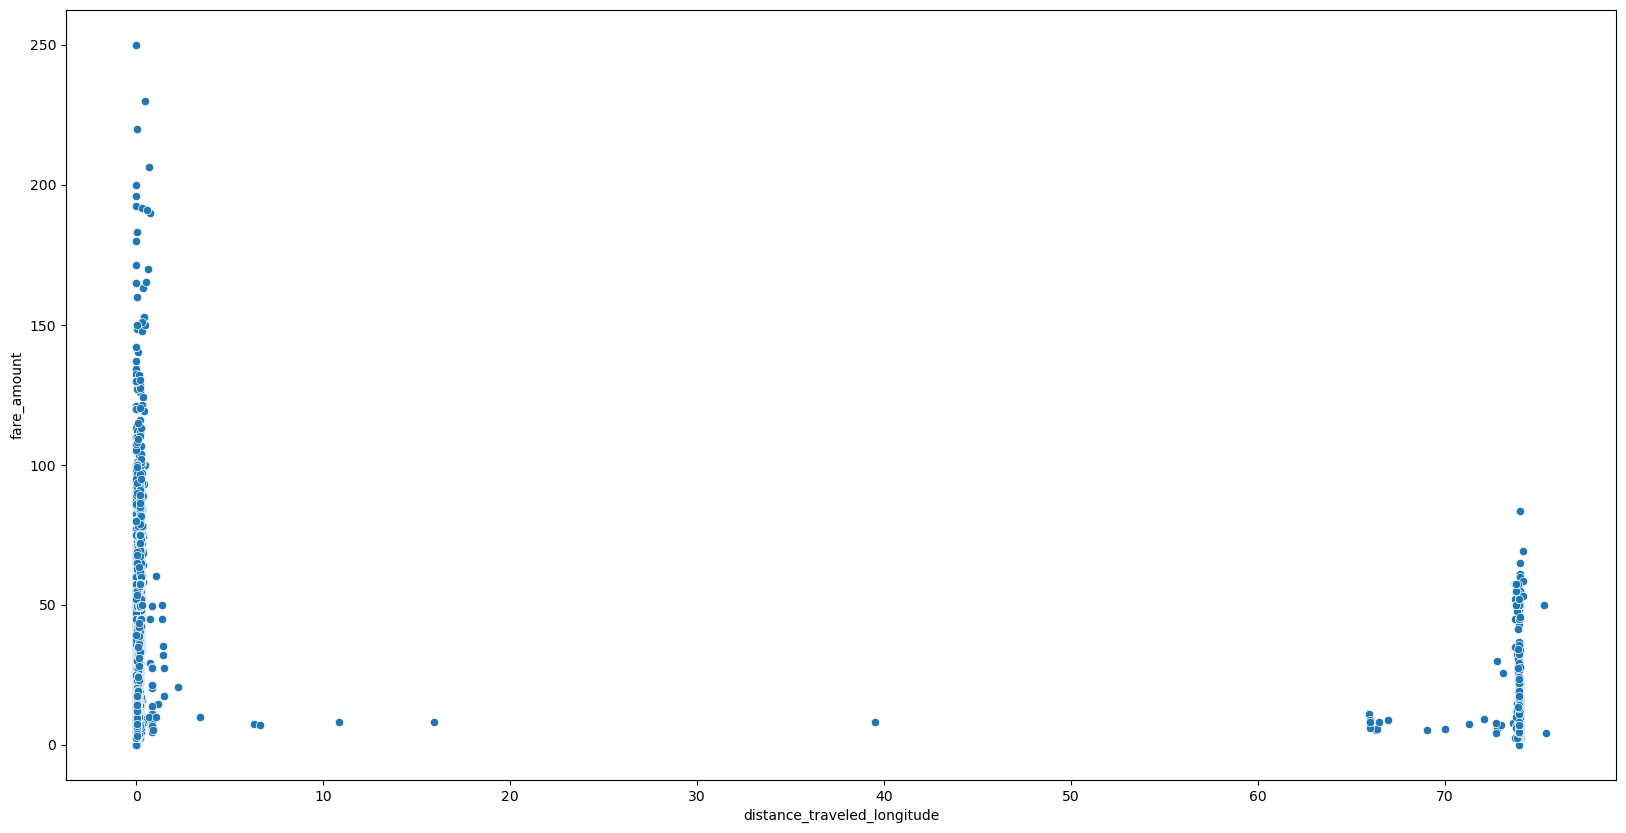

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['fare_amount'],x=df['distance_traveled_longitude'])

<Axes: xlabel='distance_traveled_latitude', ylabel='fare_amount'>

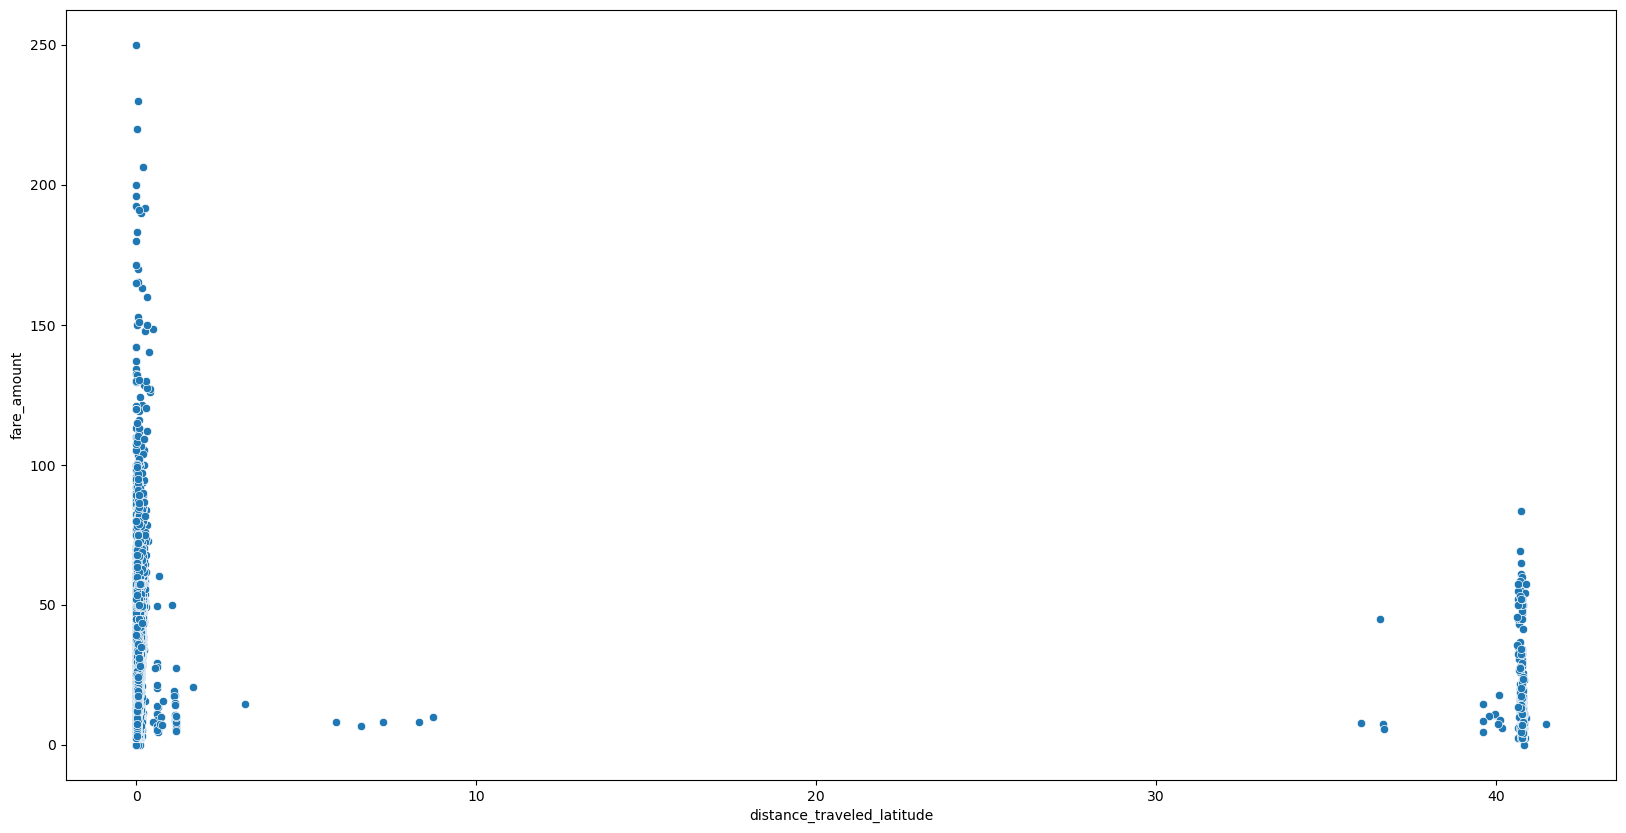

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['fare_amount'],x=df['distance_traveled_latitude'])

In [35]:
print((len(df[df['distance_traveled_latitude'] > 25])/len(df))*100) 

0.18903024483917427


We still see a big gap between two different groups when it comes to longitude and latitude traveled. The difference could be due to the number of passengers or a time factor such as day, time of the day and the like. However, given that the number of observations in this group is less than 1% of all of the observation, it may not ecessarily be a bad idea to drop them. However, we need some further analysis before making that decision.

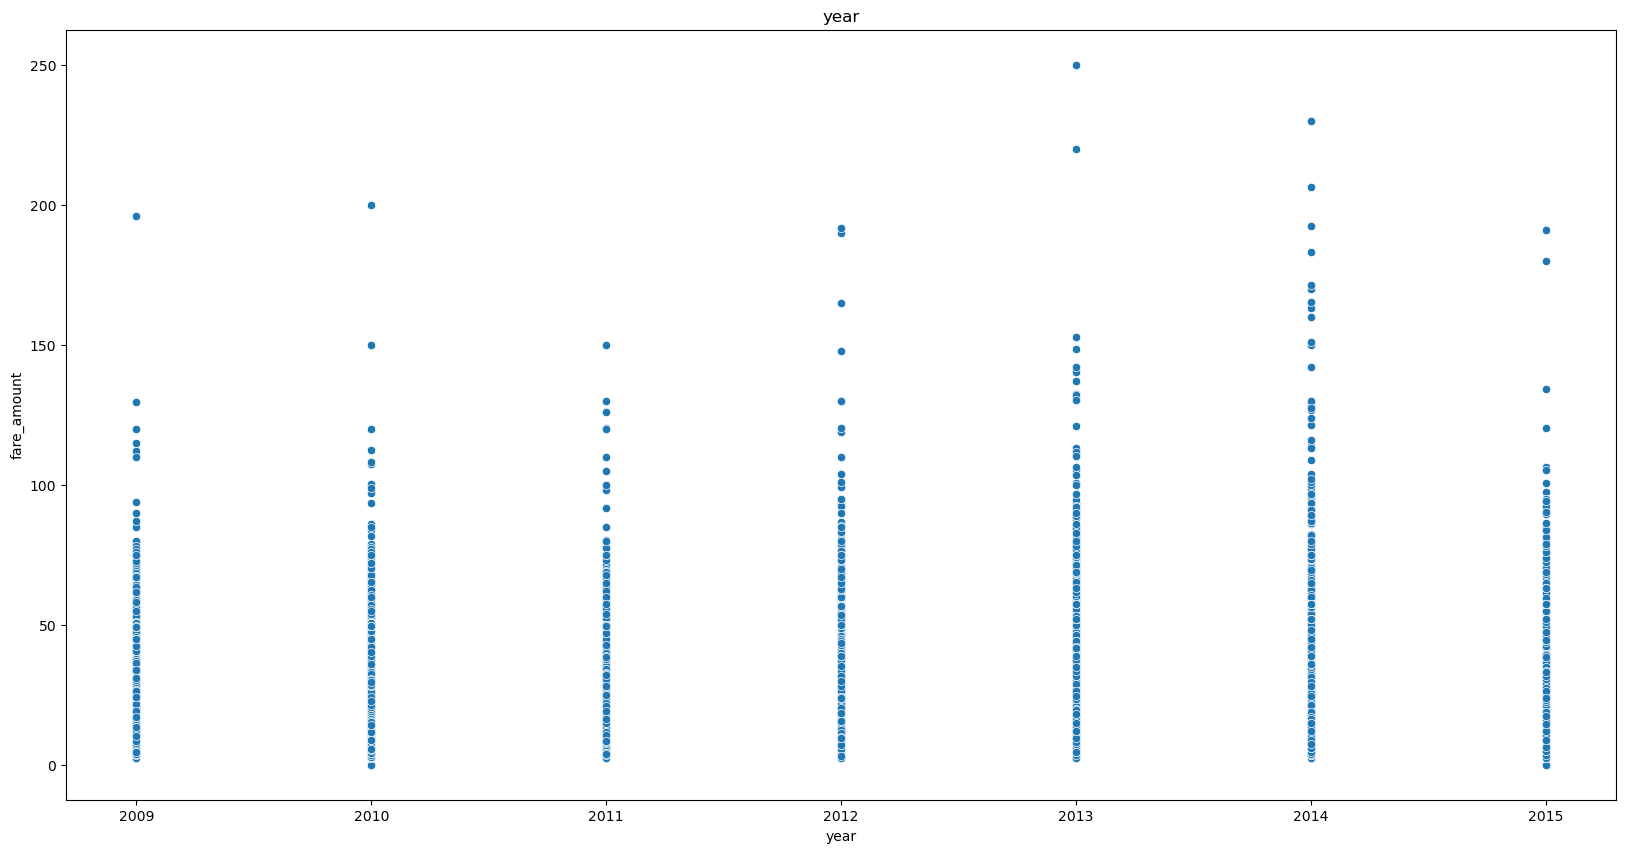

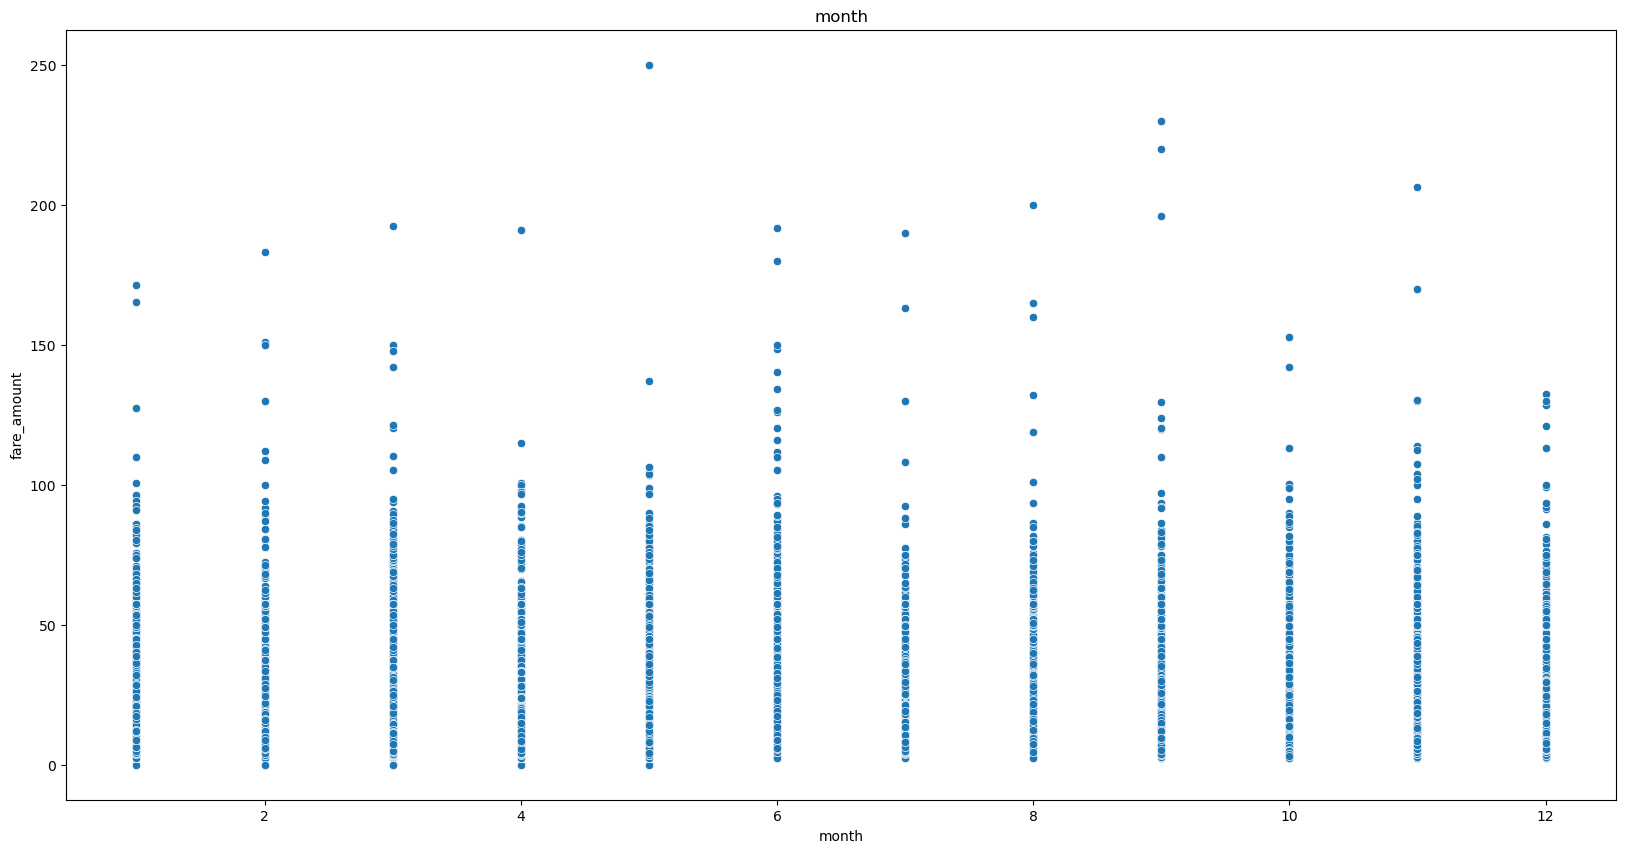

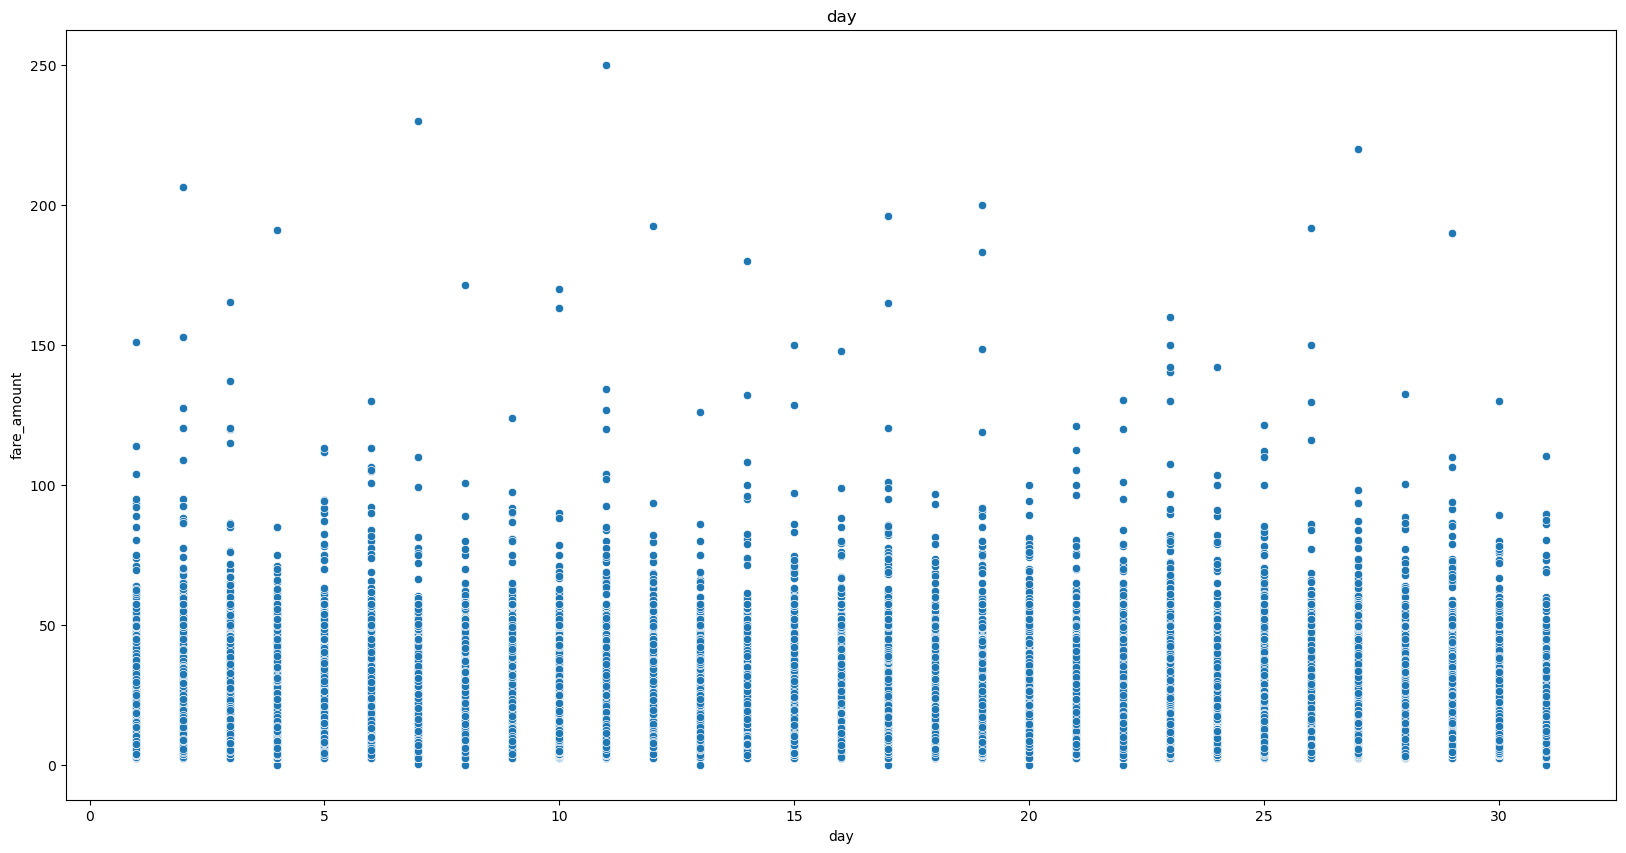

In [36]:
for col in date_cols:
    plt.figure(figsize=(20,10))
    sns.scatterplot(x=df[col],y=df['fare_amount'])
    plt.title(col)

<Axes: xlabel='pickup_hour', ylabel='fare_amount'>

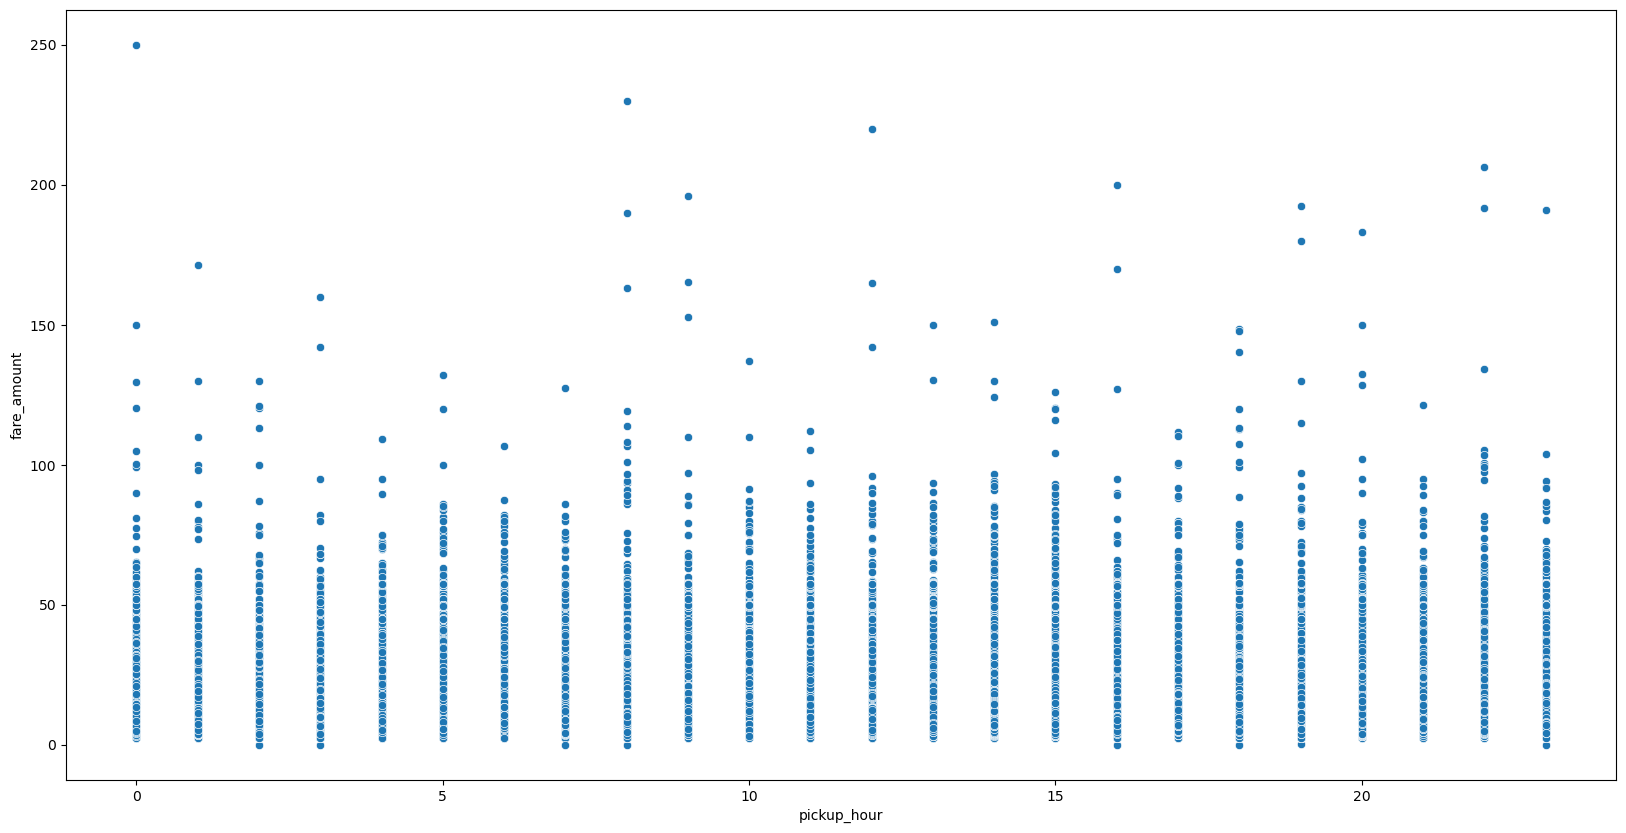

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['pickup_hour'],y=df['fare_amount'])

In [38]:
df.drop(df[df['passenger_count'] > 10].index,inplace=True)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

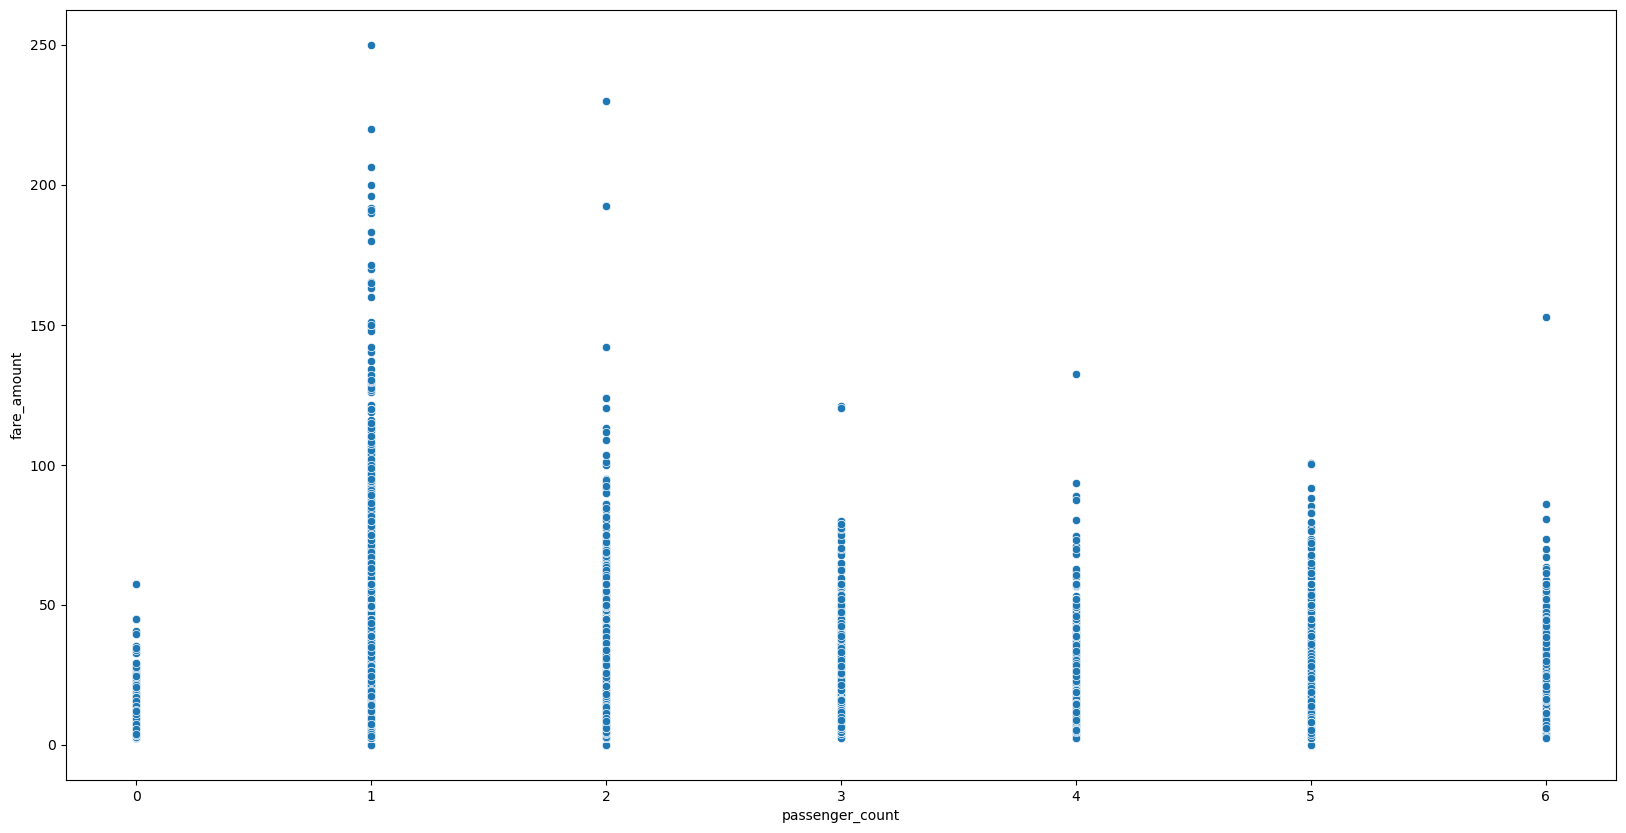

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['passenger_count'],y=df['fare_amount'])

In [40]:
df.drop(df[df['distance_traveled_latitude'] > 3].index,inplace=True)

In [41]:
df.drop(df[df['distance_traveled_longitude'] > 3].index,inplace=True)

<Axes: xlabel='distance_traveled_latitude', ylabel='fare_amount'>

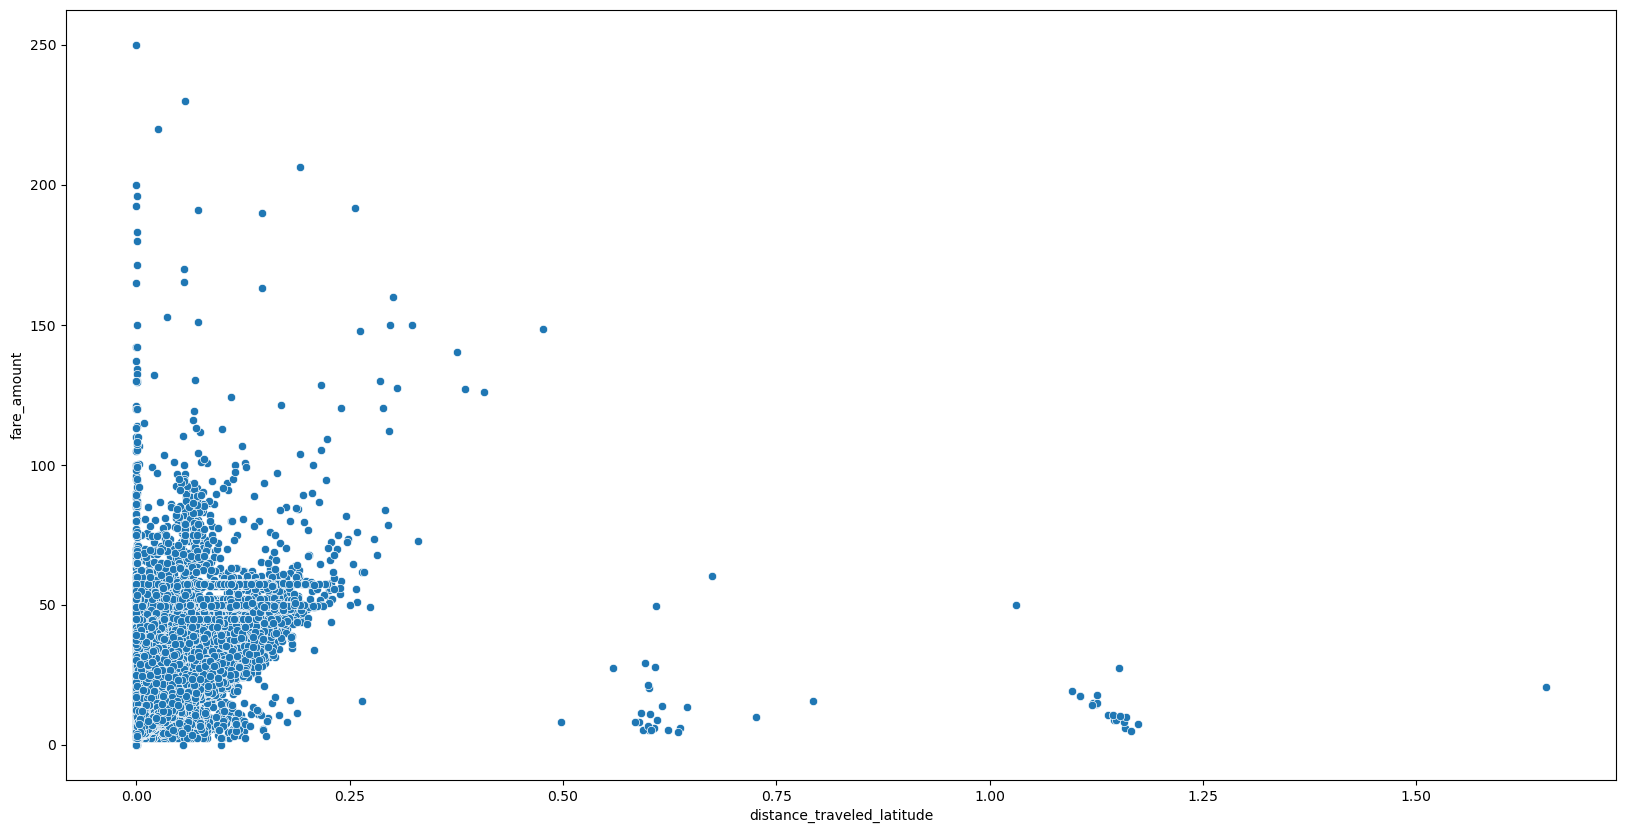

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['fare_amount'],x=df['distance_traveled_latitude'])

<Axes: xlabel='distance_traveled_longitude', ylabel='fare_amount'>

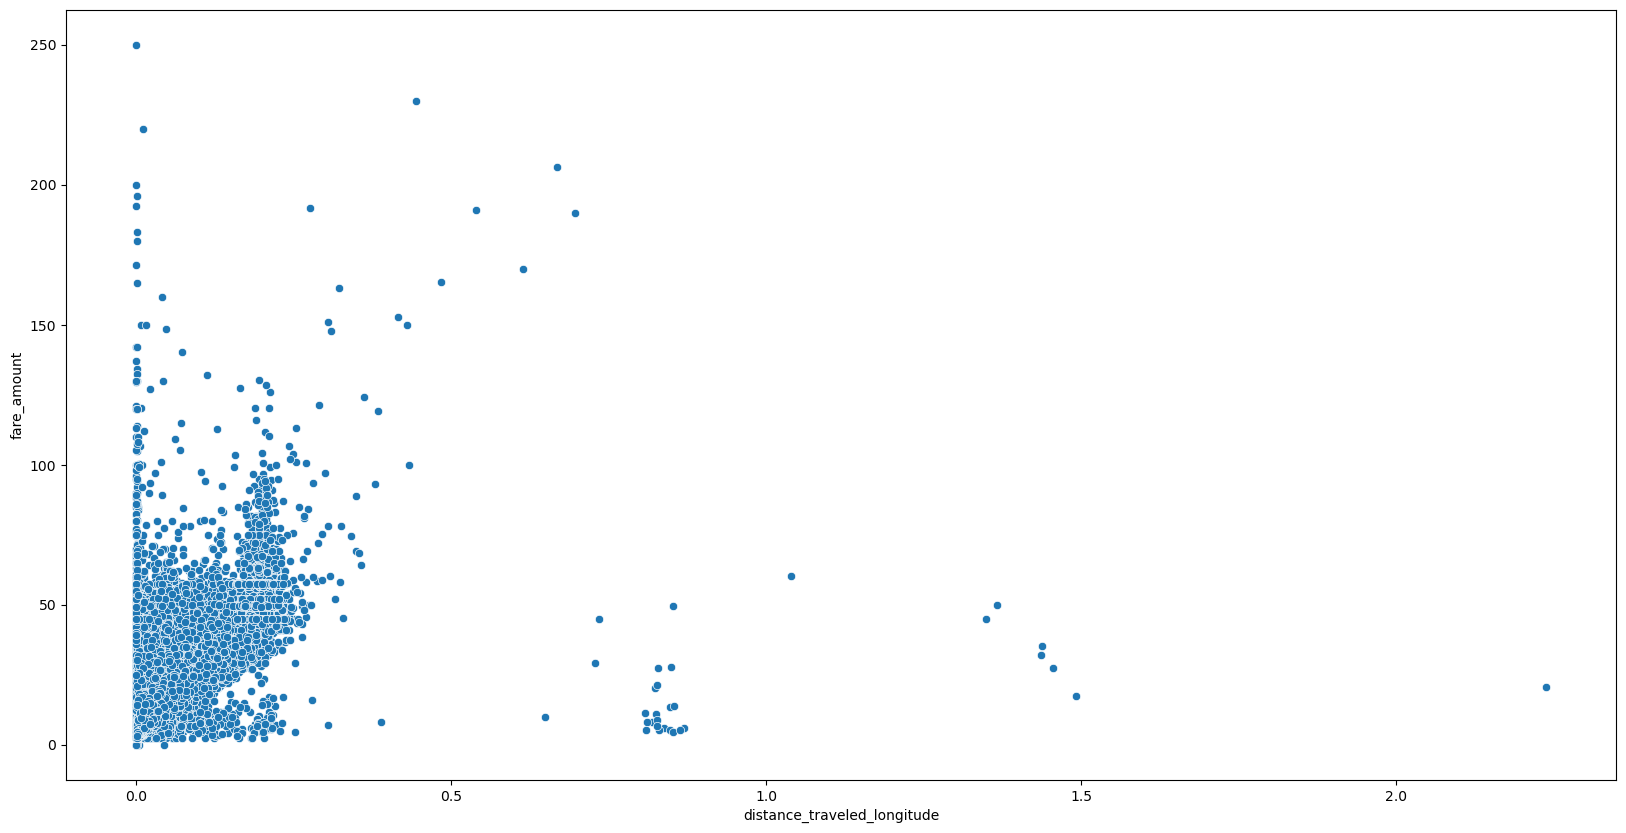

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['fare_amount'],x=df['distance_traveled_longitude'])

After taking care of the outliers for distance traveled and fare amounts, we can see a nomal positive relationship between these two variables as we can expect.

In [44]:
len(df)

199539

In [45]:
df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour,pickup_minute,pickup_point,dropoff_point,distance_traveled_longitude,distance_traveled_latitude
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,"40.74,-74.0","40.72,-74.0",0.000305,0.015137
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,"40.73,-73.99","40.75,-73.99",0.000355,0.022100
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,"40.74,-74.01","40.77,-73.96",0.042478,0.031877


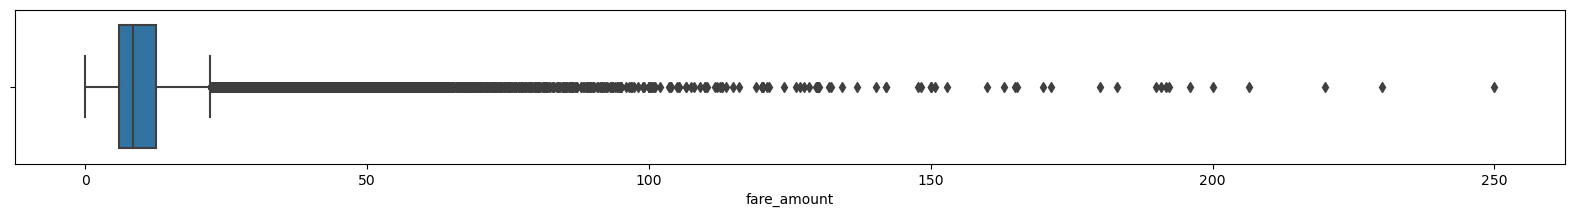

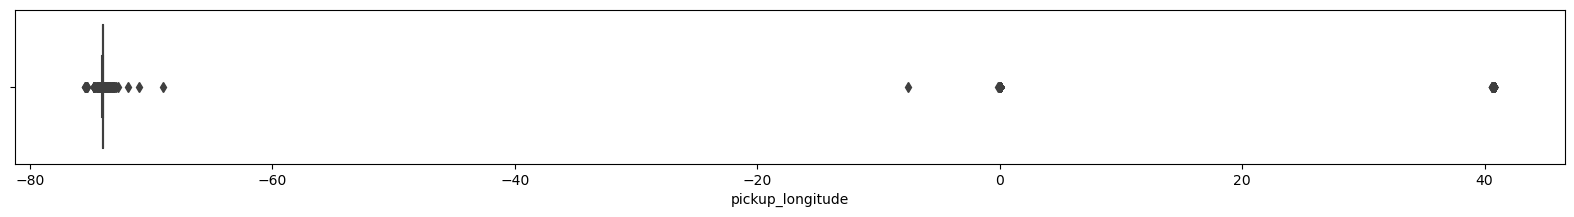

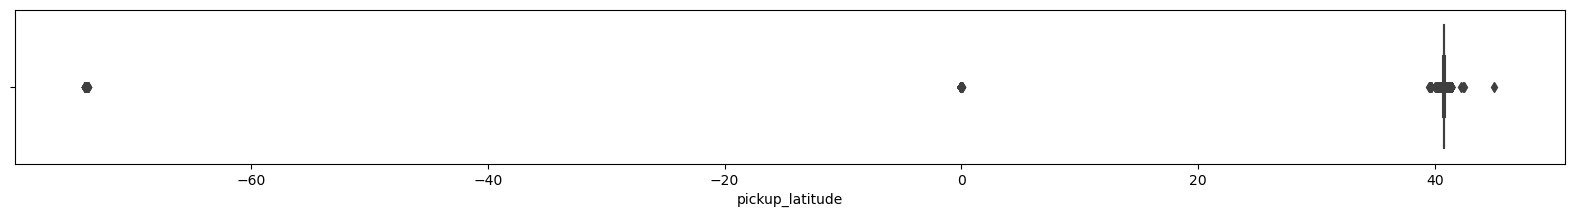

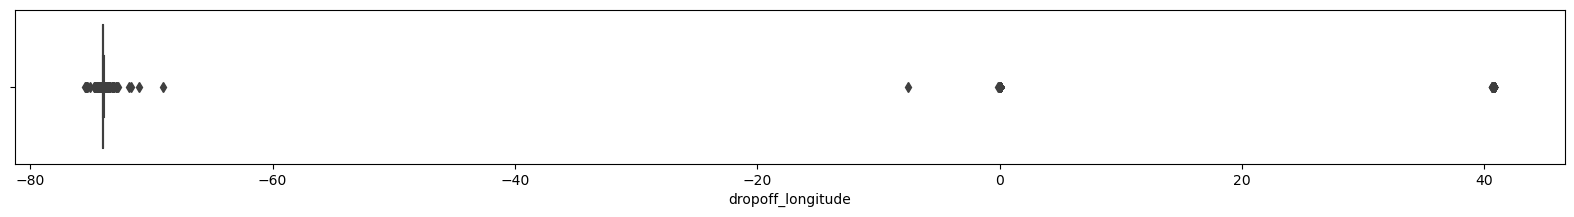

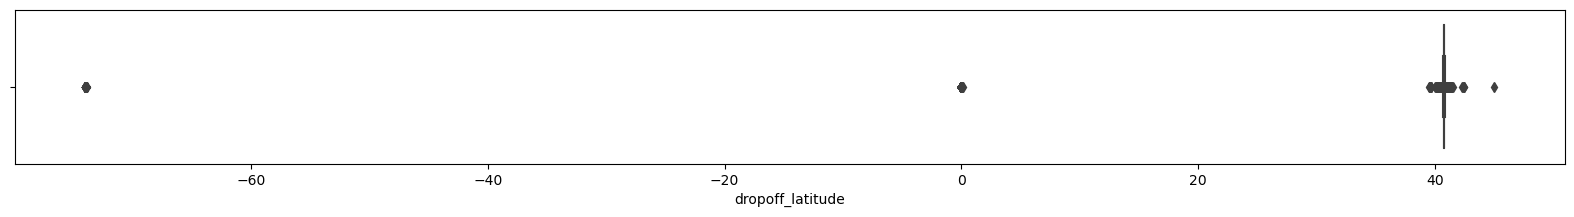

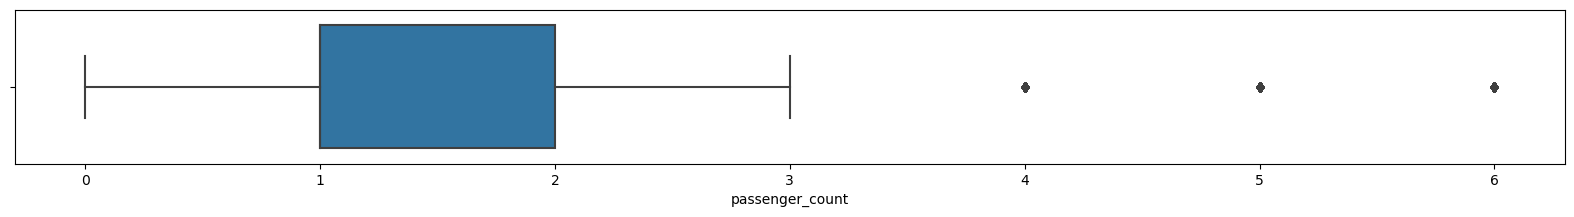

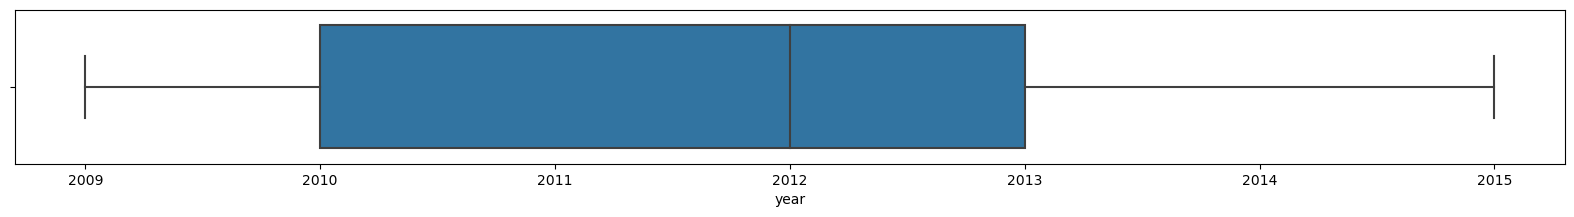

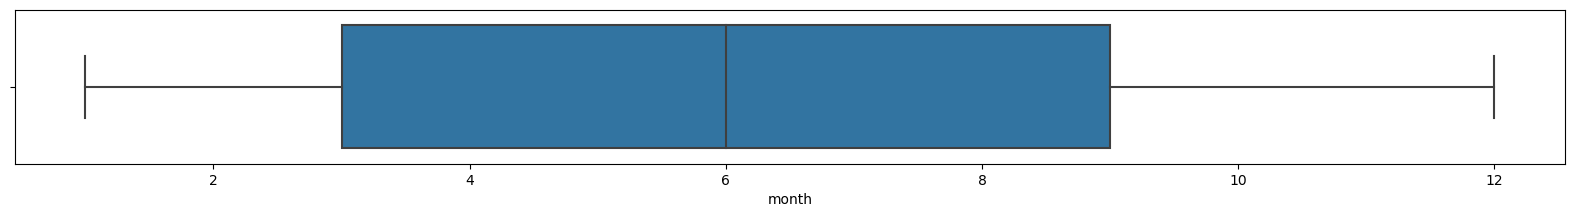

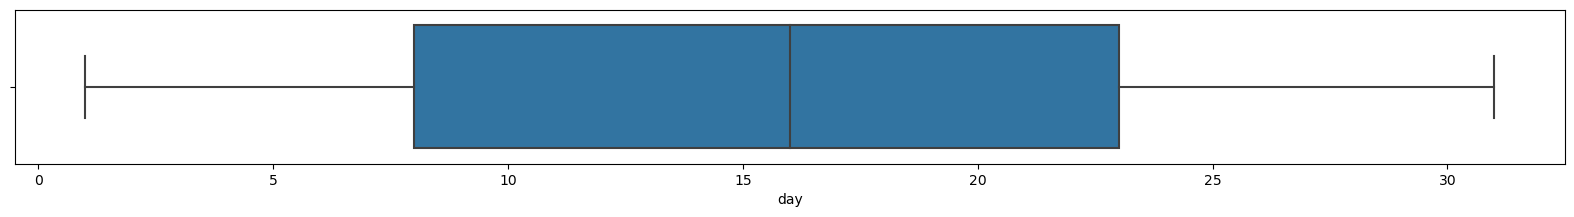

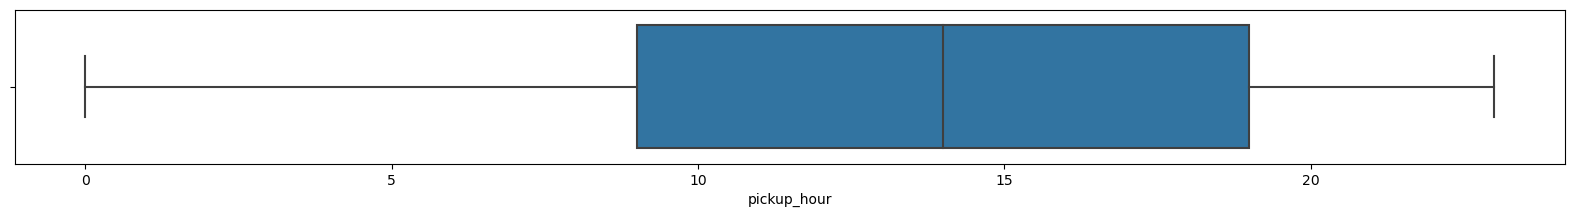

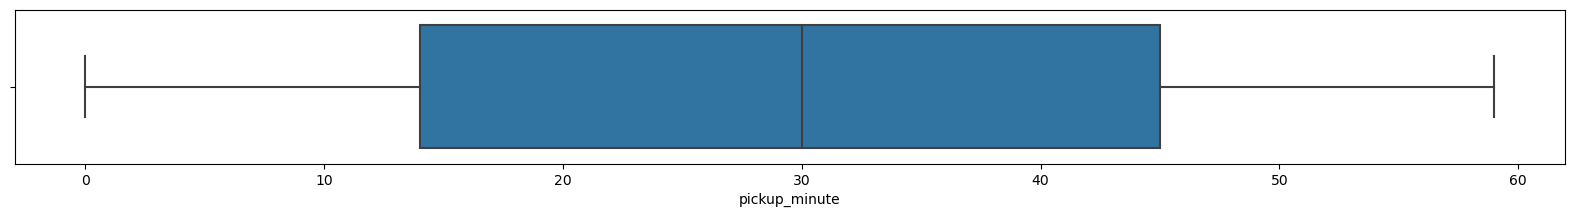

In [46]:
for col in df.columns[0:-4]:
    plt.figure(figsize=(20,2))
    sns.boxplot(x=df[col])

We still have some outliers to take care of in our latitude columns

In [47]:
df.drop(df[df['pickup_longitude'] > -60].index,inplace=True)
df.drop(df[df['pickup_latitude'] < 20].index,inplace=True)
df.drop(df[df['dropoff_longitude'] > -60].index,inplace=True)
df.drop(df[df['dropoff_latitude'] < 20].index,inplace=True)

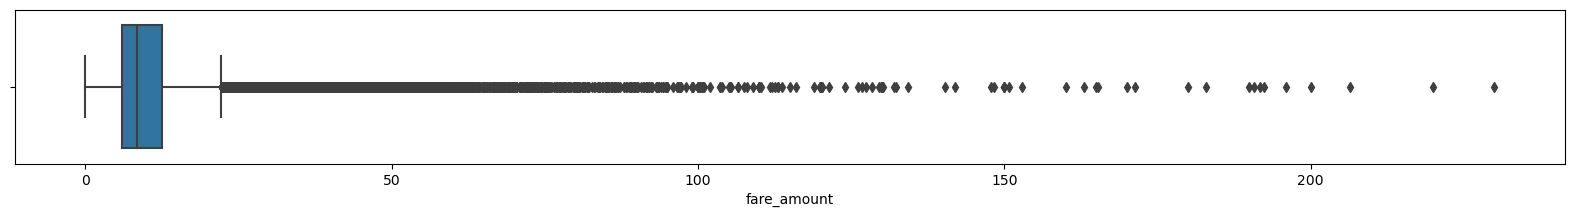

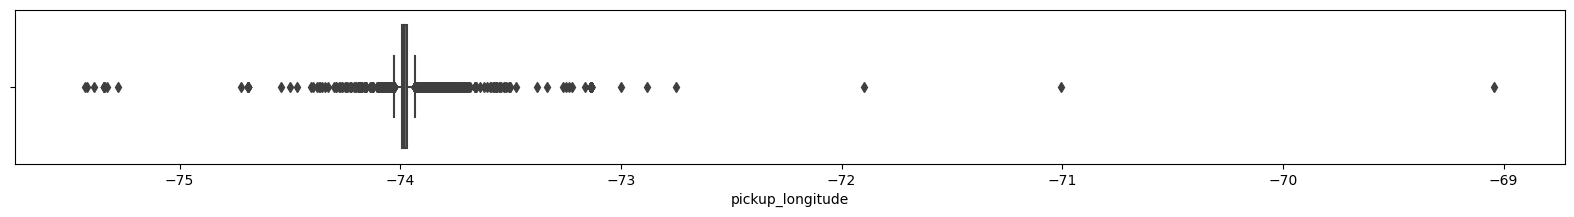

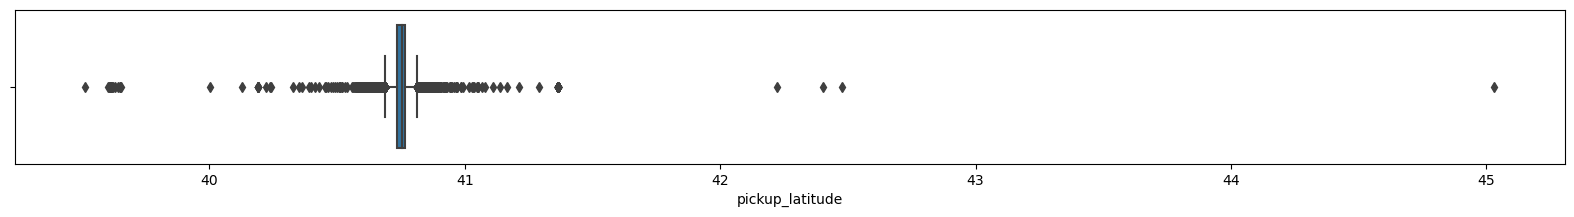

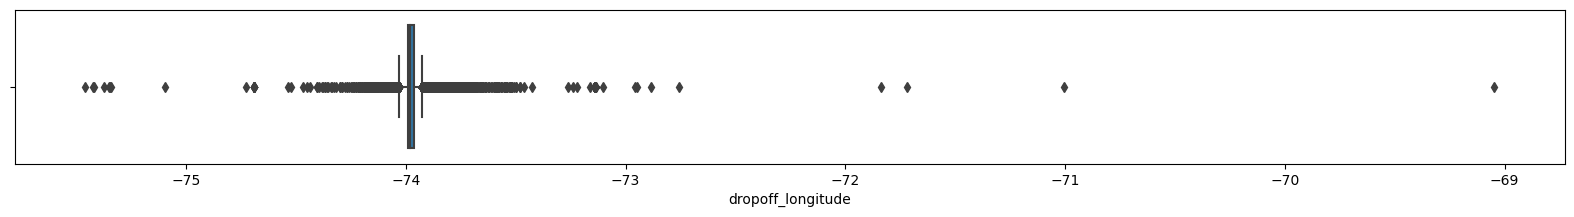

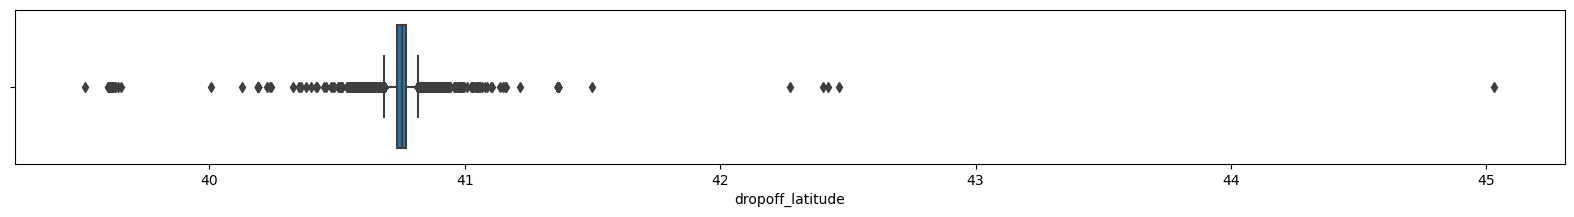

In [48]:
for col in df.columns[0:5]:
    plt.figure(figsize=(20,2))
    sns.boxplot(x=df[col])

In [49]:
df['pickup_point'].nunique()

765

In [50]:
most_popular_pickup_points = df['pickup_point'].value_counts().sort_values(ascending=False).head(10)
most_popular_pickup_points

40.76,-73.97    12072
40.75,-73.99    11120
40.76,-73.98    10380
40.75,-73.98     9769
40.74,-73.99     8897
40.76,-73.99     8816
40.73,-73.99     7236
40.77,-73.96     6662
40.77,-73.98     6403
40.73,-74.0      6228
Name: pickup_point, dtype: int64

In [51]:
df['dropoff_point'].nunique()

1114

In [52]:
most_popular_dropoff_points = df['dropoff_point'].value_counts().sort_values(ascending=False).head(10)
most_popular_dropoff_points

40.76,-73.97    11387
40.76,-73.98    10977
40.75,-73.99    10432
40.75,-73.98     9673
40.74,-73.99     7579
40.76,-73.99     7235
40.77,-73.96     6397
40.73,-73.99     5992
40.74,-73.98     5493
40.77,-73.98     5373
Name: dropoff_point, dtype: int64

By rounding up a couple of decimals in longitude and latitude we can infer what are some of the most popular pickup and dropoff points which could be extremely useful for analytical purposes if we had information regarding the name of the places where these points belong.

## Develop Model

In [53]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour,pickup_minute,pickup_point,dropoff_point,distance_traveled_longitude,distance_traveled_latitude
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,"40.74,-74.0","40.72,-74.0",0.000305,0.015137
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,"40.73,-73.99","40.75,-73.99",0.000355,0.022100
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,"40.74,-74.01","40.77,-73.96",0.042478,0.031877
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,"40.79,-73.98","40.8,-73.97",0.010808,0.012505
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,"40.74,-73.93","40.76,-73.97",0.048059,0.017162


At this point we can go ahead and remove columns 'pickup_point', 'dropoff_point', in order to avoid redundancy.

In [54]:
df.drop(['pickup_point','dropoff_point'], axis=1, inplace=True)

<Axes: >

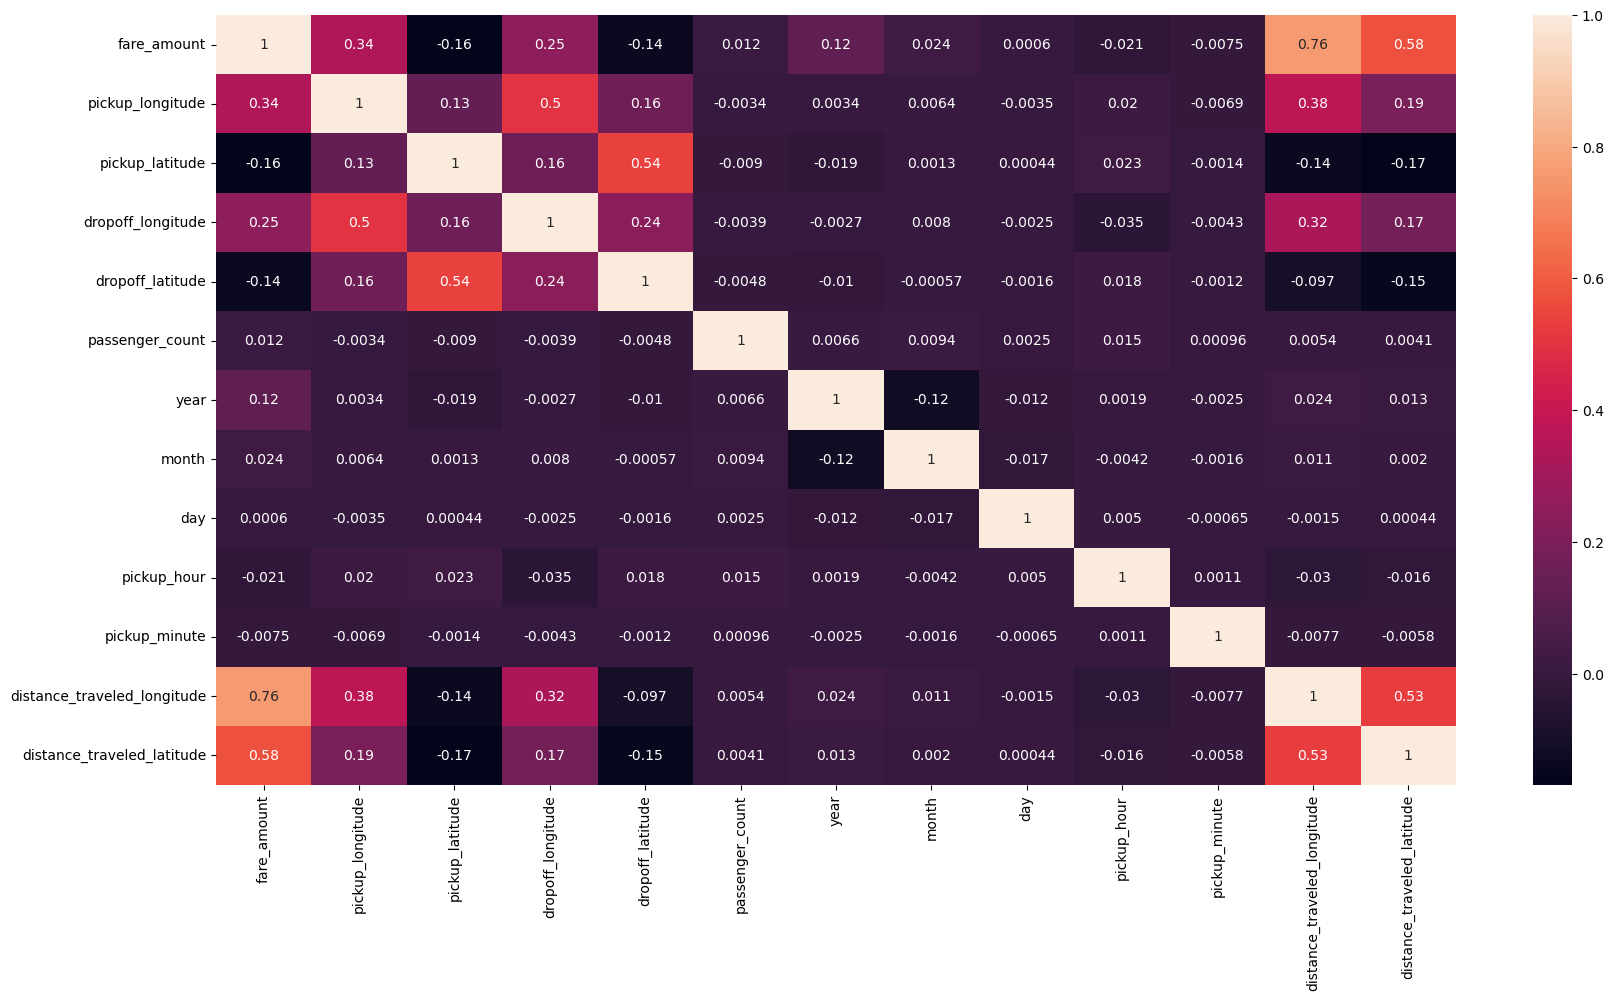

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We don't see any significant correlation between dependent variables which may be cause for concern so we can go ahead and develop a first model including all  of our variables.

In [56]:
df.drop(df[df.isnull().any(axis=1)].index,inplace=True)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
X = df.drop('fare_amount',axis=1)
y = df['fare_amount']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
ln_reg = LinearRegression()
ls_reg = Lasso()
rg_reg = Ridge()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [61]:
regressors = [ln_reg,ls_reg,rg_reg,dt_reg,rf_reg]

In [68]:
regs = []
r2_scores = []
for reg in regressors:
    reg.fit(x_train,y_train)
    train_pred = reg.predict(x_train)
    test_pred = reg.predict(x_test)
    print("The train mean squared error for", reg, " is ",mean_squared_error(y_train,train_pred))
    print("The test mean squared error for", reg, " is ",mean_squared_error(y_test,test_pred))
    print("The train r2 score for ", reg, " is ", r2_score(y_train,train_pred))
    print("The test r2 score for ", reg, " is ", r2_score(y_test,test_pred))
    print("="*60)
    regs.append(reg)
    r2_scores.append(r2_score(y_test,test_pred))
df_final = pd.DataFrame(list(zip(regs,r2_scores)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
display(df_final)

The train mean squared error for LinearRegression()  is  35.25473447328443
The test mean squared error for LinearRegression()  is  30.794510883832626
The train r2 score for  LinearRegression()  is  0.63203693898398
The test r2 score for  LinearRegression()  is  0.659293172402957
The train mean squared error for Lasso()  is  94.75498317812044
The test mean squared error for Lasso()  is  89.22354472420125
The train r2 score for  Lasso()  is  0.011016983175297201
The test r2 score for  Lasso()  is  0.01284125003247738
The train mean squared error for Ridge()  is  35.25570085456276
The test mean squared error for Ridge()  is  30.799181989990313
The train r2 score for  Ridge()  is  0.6320268526049844
The test r2 score for  Ridge()  is  0.6592414918366912
The train mean squared error for DecisionTreeRegressor()  is  7.808952313360391e-30
The test mean squared error for DecisionTreeRegressor()  is  28.89200310210126
The train r2 score for  DecisionTreeRegressor()  is  1.0
The test r2 score fo

,Model Name,R2_Score
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.840653
3,DecisionTreeRegressor(),0.680342
0,LinearRegression(),0.659293
2,Ridge(),0.659241
1,Lasso(),0.012841
